# Camera mapping

To use the RGB images as labels for the IRCCAM data, we need a way to map the RGB view to the IRCCAM view. This notebook explores a few approaches to aligning the two views.

## IRCCAM data

In [2]:
import mat73 # scipy wouldn't load matlab 7.3 files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from matplotlib.pyplot import figure

In [4]:
idata = mat73.loadmat('../data/davos/irrcam/irccam_20190816_rad.mat')

In [5]:
idata.keys()

dict_keys(['AZ', 'BT', 'CF', 'CLOUDS', 'CSFIT', 'CameraToffset', 'IRR', 'TM', 'ZA', 'alphadata', 'cloudheight', 'img', 'meteo', 'temp', 'temps', 'tempsstr', 'thor'])

In [6]:
imgnum = 600

In [7]:
idata['img'][:,:,imgnum]

array([[240.59251, 244.1211 , 247.93852, ..., 268.0701 , 269.1212 ,
        270.00278],
       [237.16144, 239.24812, 242.33423, ..., 269.27264, 270.05286,
        271.0733 ],
       [235.32957, 236.38731, 238.02786, ..., 270.3011 , 271.41345,
        272.78214],
       ...,
       [262.15884, 262.04288, 261.97452, ..., 223.55362, 223.64934,
        223.78435],
       [262.0303 , 261.9505 , 262.04398, ..., 223.53189, 223.56403,
        223.65323],
       [261.97092, 262.01633, 262.10037, ..., 223.52045, 223.58525,
        223.55249]], dtype=float32)

In [8]:
def plotfig(img):
    figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    implot = plt.imshow(img, cmap='gray')

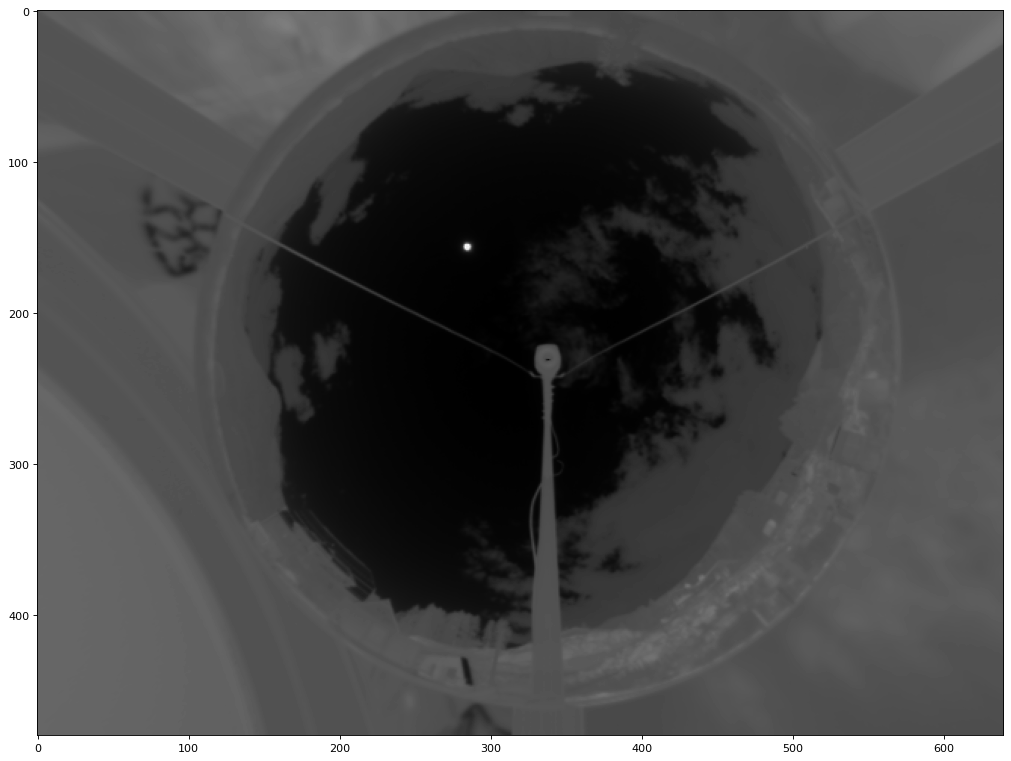

In [9]:
plotfig(idata['img'][:,:,600])

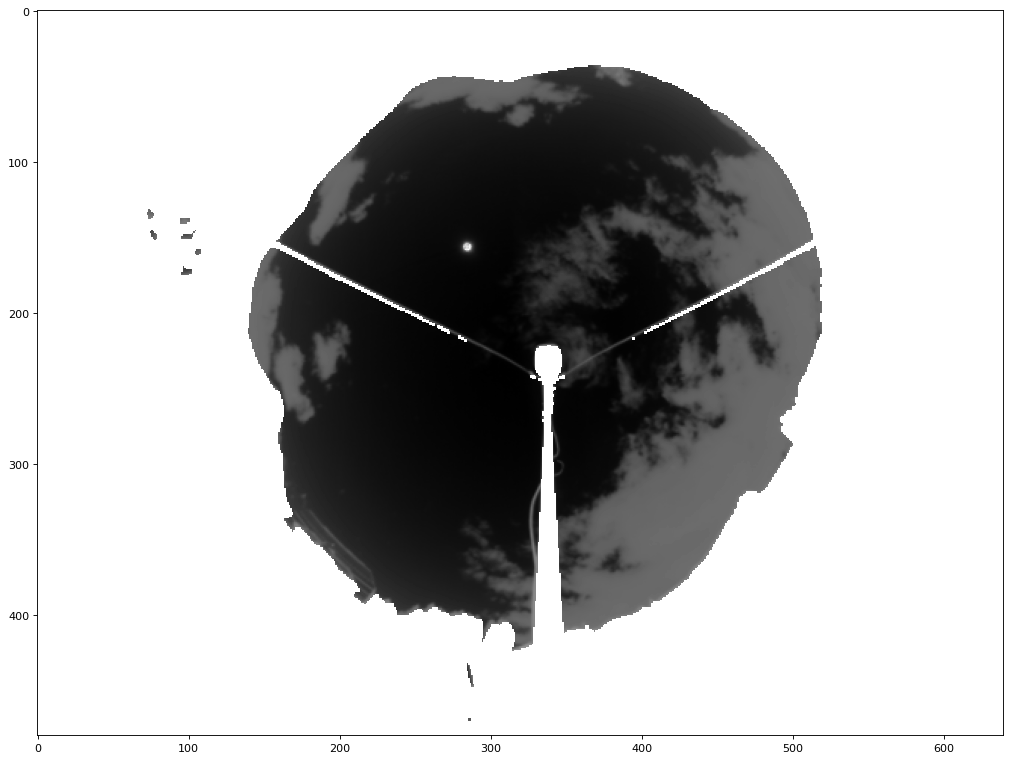

In [10]:
plotfig(idata['BT'][:,:,imgnum])

## RGB data

In [11]:
img = plt.imread('../data/davos/rgb/20190816/20190816100000_0.jpg')

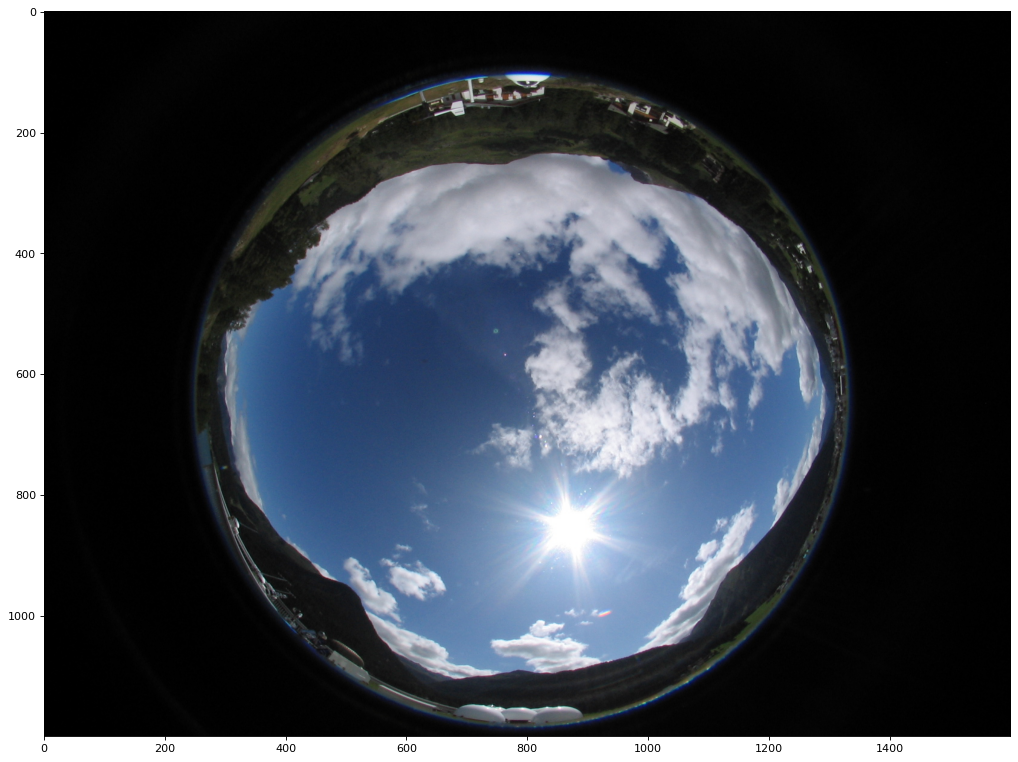

In [12]:
plotfig(img)

## SIFT feature mapping

In [14]:
import cv2

In [15]:
sift = cv2.SIFT_create()

In [18]:
img = cv2.imread('../data/davos/rgb/20190816/20190816100000_0.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
imgkp = cv2.drawKeypoints(gray,kp,img)

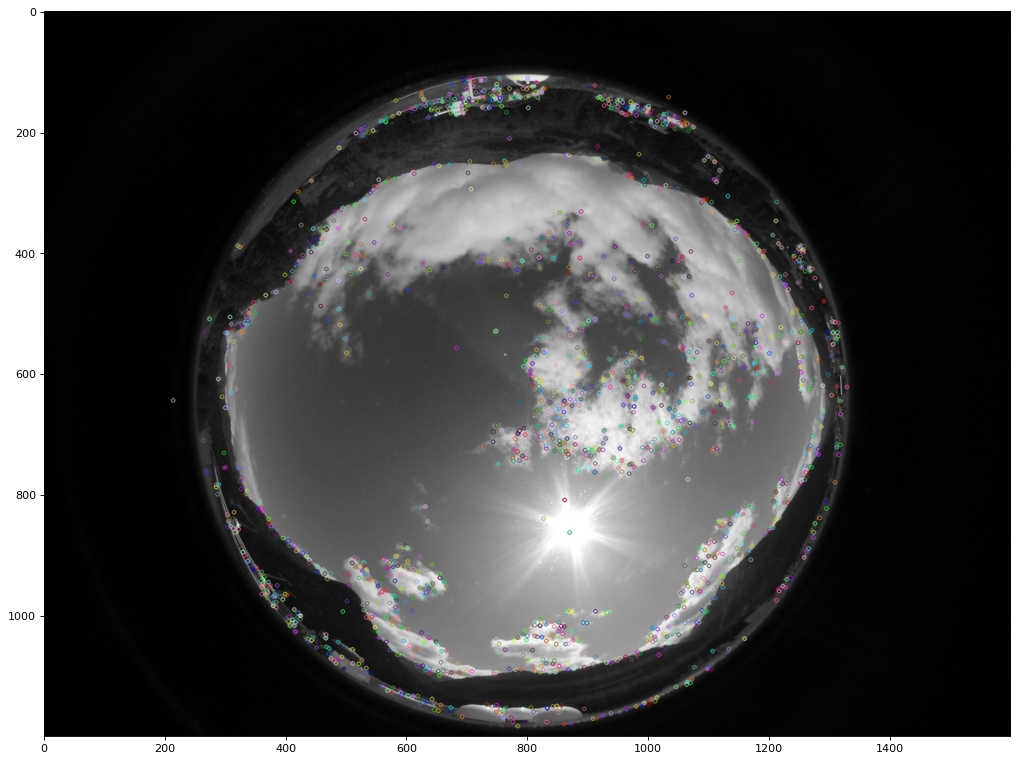

In [20]:
plotfig(imgkp)

In [49]:
ir_600 = idata['img'][:,:,600]
gray_ir = ir_600 - ir_600.min()
gray_ir *= (255.0/gray_ir.max())
gray_ir = np.array(gray_ir.round(), dtype = np.uint8)

sift = cv2.SIFT_create()
kp_ir = sift.detect(gray_ir,None)
imgkp_ir = cv2.drawKeypoints(gray_ir,kp_ir,None)

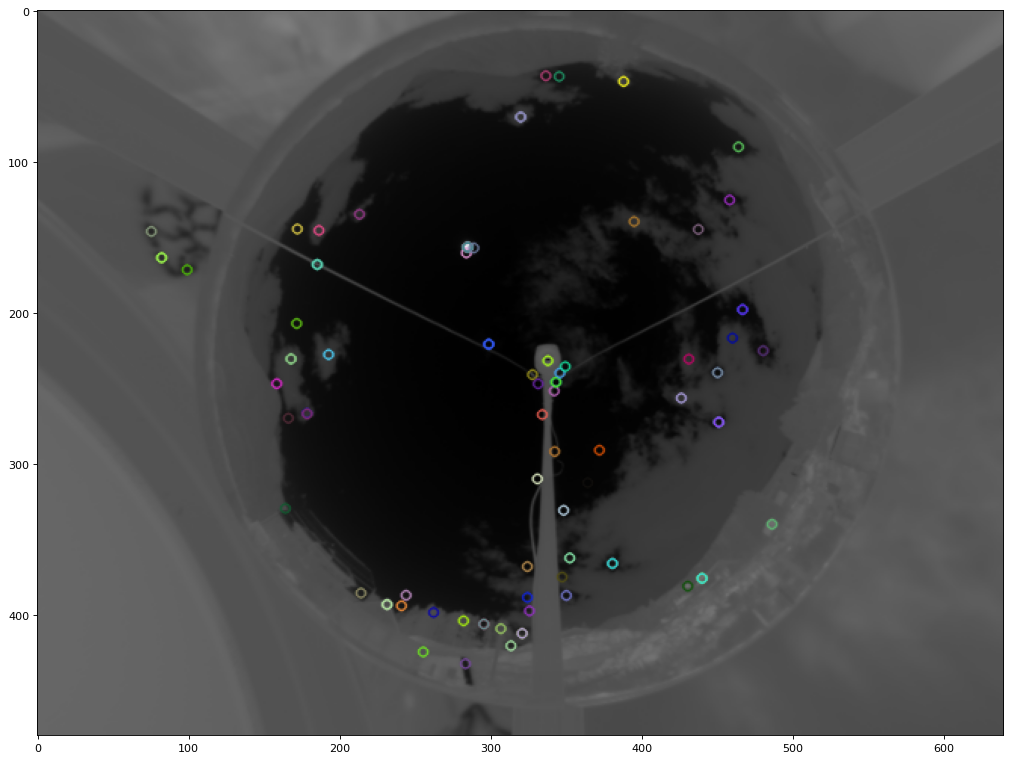

In [50]:
plotfig(imgkp_ir)

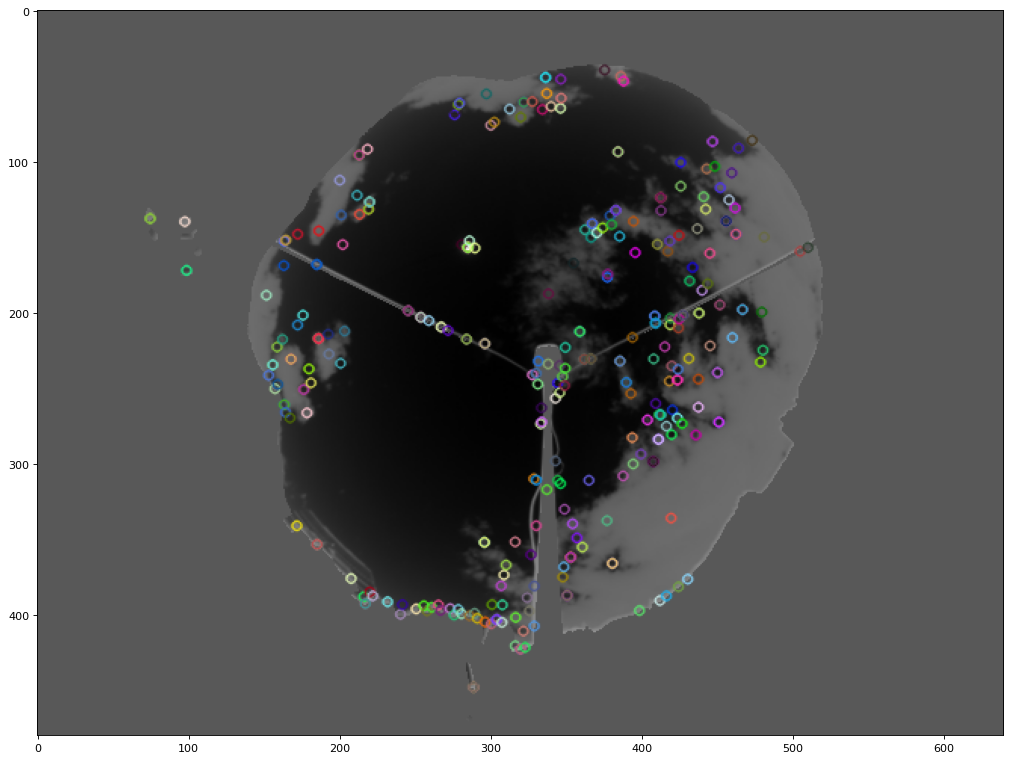

In [57]:
ir_600 = np.nan_to_num(idata['BT'][:,:,600])
gray_ir = ir_600 - ir_600.min()
gray_ir *= (255.0/gray_ir.max())
gray_ir = np.array(gray_ir.round(), dtype = np.uint8)

sift = cv2.SIFT_create()
kp_ir = sift.detect(gray_ir,None)
imgkp_ir = cv2.drawKeypoints(gray_ir,kp_ir,None)
plotfig(imgkp_ir)